# Import thư viện

In [827]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Implement KMeans

In [828]:
class KMeans:
  def __init__(self, n_clusters, max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None
    self.labels = None

  def fit(self, X):
    # Randomly initialize centroids
    idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
    self.centroids = X[idx]

    for iter in range(self.max_iter):
      # E-Step
      diff = X[:, np.newaxis] - self.centroids
      dist_sq = np.sum(diff**2, axis=2)
      self.labels = np.argmin(dist_sq, axis=1)

      # M-Step
      new_centroids = []

      for i in range(self.n_clusters):
        cluster_i = X[self.labels == i]
        if cluster_i.size == 0:
          random_idx = np.random.choice(X.shape[0])
          new_centroids.append(X[random_idx])
        else:
          new_centroids.append(np.mean(cluster_i, axis=0))

      new_centroids = np.array(new_centroids)

      # Stop condition
      if np.linalg.norm(self.centroids - new_centroids) < 1e-4:
        print(f"Hội tụ tại vòng lặp thứ {iter}!")
        print(f"Centroids:\n {self.centroids}")
        break

      self.centroids = new_centroids

    return self.centroids, self.labels

# Implement KMeans++

In [829]:
class KMeansPlusPlus:
  def __init__(self, n_clusters, max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None
    self.labels = None

  def _init_centroids(self, X):
    centroids = np.empty((self.n_clusters, X.shape[1]))

    # Chọn ngẫu nhiên centroid đầu tiên
    random_idx = np.random.choice(X.shape[0])
    centroids[0] = X[random_idx]

    # Tính khoảng cách bình phương từ mọi điểm đến centroid đầu tiên
    dist_sq_min = np.sum((X - centroids[0])**2, axis=1)

    # Chọn các centroid còn lại
    for i in range(1, self.n_clusters):
      # Điểm nào xa centroid cũ nhất thì xác suất được chọn cao nhất
      probs = dist_sq_min / np.sum(dist_sq_min)
      next_centroid_idx = np.random.choice(X.shape[0], p=probs)
      centroids[i] = X[next_centroid_idx]

      # Cập nhật khoảng cách ngắn nhất cho từng điểm nếu tâm mới gần hơn tâm cũ
      dist_to_new_centroid = np.sum((X - centroids[i])**2, axis=1)
      dist_sq_min = np.minimum(dist_sq_min, dist_to_new_centroid)

    return centroids

  def fit(self, X):
    # KMeans++ initialize centroids
    self.centroids = self._init_centroids(X)

    for iter in range(self.max_iter):
      # E-Step
      diff = X[:, np.newaxis] - self.centroids
      dist_sq = np.sum(diff**2, axis=2)
      self.labels = np.argmin(dist_sq, axis=1)

      # M-Step
      new_centroids = []

      for i in range(self.n_clusters):
        cluster_i = X[self.labels == i]
        if cluster_i.size == 0:
          random_idx = np.random.choice(X.shape[0])
          new_centroids.append(X[random_idx])
        else:
          new_centroids.append(np.mean(cluster_i, axis=0))

      new_centroids = np.array(new_centroids)

      # Stop condition
      if np.linalg.norm(self.centroids - new_centroids) < 1e-4:
        print(f"Hội tụ tại vòng lặp thứ {iter}!")
        print(f"Centroids:\n {self.centroids}")
        break

      self.centroids = new_centroids

    return self.centroids, self.labels

# Assignment 1

Hội tụ tại vòng lặp thứ 6!
Centroids:
 [[7.93924027 2.98407134]
 [3.1984887  6.11049523]
 [2.0191059  2.03147588]]


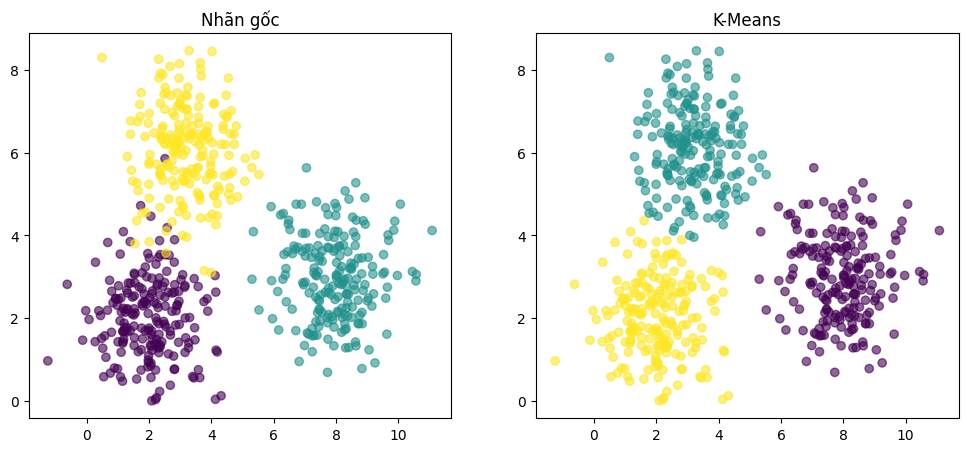

In [830]:
c1 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 200)
c2 = np.random.multivariate_normal([8, 3], [[1, 0], [0, 1]], 200)
c3 = np.random.multivariate_normal([3, 6], [[1, 0], [0, 1]], 200)
X = np.vstack([c1, c2, c3])

final_centroids, final_labels = KMeans(n_clusters=3).fit(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X[:, 0], X[:, 1], c=np.repeat([0, 1, 2], 200), alpha=0.6)
ax1.set_title("Nhãn gốc")
ax2.scatter(X[:, 0], X[:, 1], c=final_labels, alpha=0.6)
ax2.set_title("K-Means")
plt.show()

- **Ảnh hưởng:** Hội tụ tại cực trị địa phương. Nếu khởi tạo các tâm cụm một cách ngẫu nhiên, có nguy cơ chúng rơi vào vị trí xấu dẫn đến phân cụm không tối ưu (một cụm có thể bị chia cắt, hoặc hai cụm riêng biệt bị gộp làm một)
- **Giải pháp:** KMeans++ (được dùng ở các bài sau)

# Assignment 2

Hội tụ tại vòng lặp thứ 9!
Centroids:
 [[3.08708124 6.5139698 ]
 [7.93232546 3.39067602]
 [2.60505724 4.48254501]]


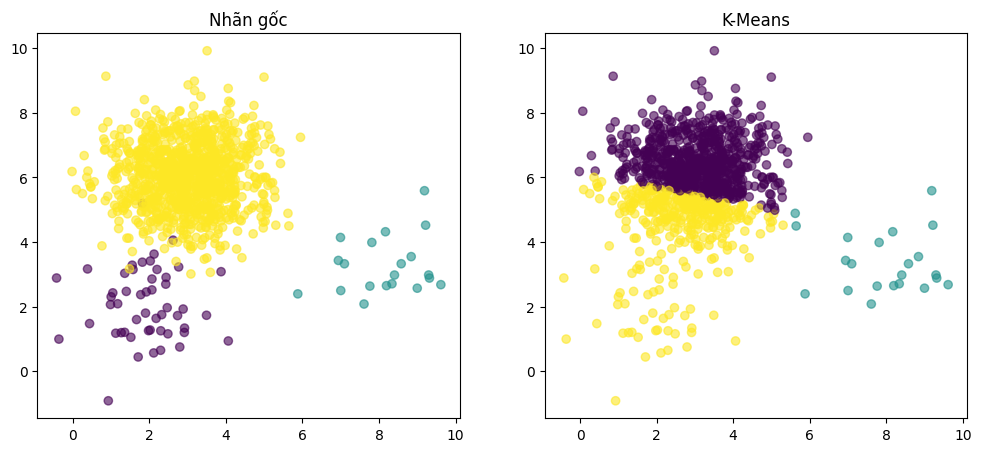

In [831]:
c1 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 50)
c2 = np.random.multivariate_normal([8, 3], [[1, 0], [0, 1]], 20)
c3 = np.random.multivariate_normal([3, 6], [[1, 0], [0, 1]], 1000)
X = np.vstack([c1, c2, c3])

final_centroids, final_labels = KMeansPlusPlus(n_clusters=3).fit(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X[:, 0], X[:, 1], c=np.repeat([0, 1, 2], [50, 20, 1000]), alpha=0.6)
ax1.set_title("Nhãn gốc")
ax2.scatter(X[:, 0], X[:, 1], c=final_labels, alpha=0.6)
ax2.set_title("K-Means")
plt.show()

- **Ảnh hưởng:** Gán nhầm các điểm ở rìa của cụm lớn (vốn rất đông) sang cho cụm nhỏ và kéo lệch tâm cụm nhỏ về phía cụm lớn.

# Assignment 3

Hội tụ tại vòng lặp thứ 16!
Centroids:
 [[1.92479491 6.00907221]
 [2.05234222 1.8534267 ]
 [7.94178352 3.33665136]]


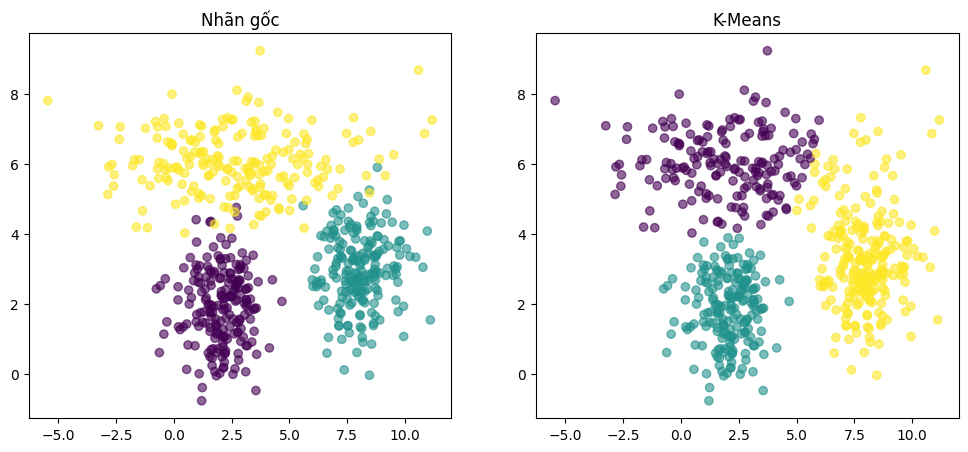

In [832]:
c1 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 200)
c2 = np.random.multivariate_normal([8, 3], [[1, 0], [0, 1]], 200)
c3 = np.random.multivariate_normal([3, 6], [[10, 0], [0, 1]], 200)
X = np.vstack([c1, c2, c3])

final_centroids, final_labels = KMeans(n_clusters=3).fit(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X[:, 0], X[:, 1], c=np.repeat([0, 1, 2], 200), alpha=0.6)
ax1.set_title("Nhãn gốc")
ax2.scatter(X[:, 0], X[:, 1], c=final_labels, alpha=0.6)
ax2.set_title("K-Means")
plt.show()

**Ảnh hưởng:** Gán nhầm phần rìa $\mathcal{N}((3, 6), \Sigma_2)$ sang cho cụm khác gần đó